In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
import time
import zipfile
import locale

pd.set_option("display.max_columns", 50)
locale.setlocale( locale.LC_ALL, '' )

dtype_dict={"DISTRICT CODE": int, 
            "DISTRICT NAME": str,
            "PROPERTY ID": int,
            "PROPERTY TYPE": str,
            "PROPERTY NAME": str,
            "UNIT NUMBER": str,
            "HOUSE NUMBER": str,
            "STREET NAME": str,
            "SUBURB NAME": str,
            "POSTCODE": float,
            "PROPERTY DESCRIPTION": str,
            "ZONE CODE": str,
            "AREA": float,
            "AREA TYPE": str,
            "BASE DATE 1": str,
            "LAND VALUE 1": float,
            "AUTHORITY 1": str,
            "BASIS 1": str,
            "BASE DATE 2": str,
            "LAND VALUE 2": float,
            "AUTHORITY 2": str,
            "BASIS 2": str,
            "BASE DATE 3": str,
            "LAND VALUE 3": float,
            "AUTHORITY 3": str,
            "BASIS 3": str,
            "BASE DATE 4": str,
            "LAND VALUE 4": float,
            "AUTHORITY 4": str,
            "BASIS 4": str,
            "BASE DATE 5": str,
            "LAND VALUE 5": float,
            "AUTHORITY 5": str,
            "BASIS 5": str,
            "Unnamed: 34": str}

In [3]:
## debugging 

# import pdb; pdb.set_trace()
# c means continue
# n means n
# can type in variable names

In [ ]:
# list of suburbs with state-led greenfield residential developments
greenfield_development_suburb_list = ["BOX HILL",
                                      "COLEBEE",
                                      "MARSDEN PARK",
                                      "KELLYVILLE",
                                      "RIVERSTONE",
                                      "SCHOFIELDS",
                                      "ROUSE HILL",
                                      "VINEYARD",
                                      "SCHOFIELDS",
                                      "AUSTRAL",
                                      "CATHERINE FIELD",
                                      "EDMONDSON PARK",
                                      "LEPPINGTON",
                                      "ORAN PARK"]






# LAND VALUE DATA

In [95]:
## checking structure of land value data
zip_path = Path("data/land_value_data/LV_20170701.zip")
zf = zipfile.ZipFile(zip_path)
start_time = time.time()

test_df = pd.read_csv(zf.open("001_LAND_VALUE_DATA_20170701.csv"), dtype=dtype_dict)

elapsed_time = time.time() - start_time
print(elapsed_time)

test_df.sample(3)

0.12566494941711426


,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,PROPERTY DESCRIPTION,ZONE CODE,AREA,AREA TYPE,BASE DATE 1,LAND VALUE 1,AUTHORITY 1,BASIS 1,BASE DATE 2,LAND VALUE 2,AUTHORITY 2,BASIS 2,BASE DATE 3,LAND VALUE 3,AUTHORITY 3,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34
11383,1,CESSNOCK,11859,NORMAL,NaN,NaN,102,HOPETOUN ST,KURRI KURRI,2327.0,A/374337,R3,505.9,M,01/07/2016,129000.0,14A(1),6A(1),01/07/2015,126000.0,14A(1),6A(1),01/07/2014,116000.0,14A(1),6A(1),01/07/2013,113000.0,14A(1),6A(1),01/07/2012,113000.0,14A(1),6A(1),NaN
18288,1,CESSNOCK,11117,NORMAL,NaN,NaN,5,BOOTH ST,KURRI KURRI,2327.0,665/755231,R2,743.0,M,01/07/2016,154000.0,14A(1),6A(1),01/07/2015,149000.0,14A(1),6A(1),01/07/2014,143000.0,14A(1),6A(1),01/07/2013,138000.0,14A(1),6A(1),01/07/2012,125000.0,14A(1),6A(1),NaN
2662,1,CESSNOCK,2090,NORMAL,NaN,NaN,141,CESSNOCK RD,ABERMAIN,2326.0,101/740708,R2,833.9,M,01/07/2016,109000.0,14A(1),14G,01/07/2015,104000.0,14A(1),14G,01/07/2014,104000.0,14A(1),14G,01/07/2013,96400.0,14A(1),14G,01/07/2012,91800.0,14A(1),14G,NaN


In [5]:
## aggregating land value csv files

def read_csv_and_add_column(csv):
    df = pd.read_csv(zf.open(csv), 
                     encoding="ISO-8859-1", 
                     error_bad_lines=False,
                     dtype=dtype_dict)
    df["SOURCE CSV FILENAME"] = csv
    return df


def get_namelist_csv_only(zf):
    zf_list = zf.namelist()
    csv_list = [k for k in zf_list if ".csv" in k]
    return csv_list


zip_path_list = sorted(Path("data/land_value_data").glob("**/*.zip"))
land_value_csv_list = sorted(Path("data/land_value_data").glob("**/*.csv"))
land_value_csv_list_stems =  [k.stem for k in land_value_csv_list]

# loop through all zips, if zip isn't processed then process it
for zip_path in zip_path_list:
    if (zip_path.stem + "_combined") not in land_value_csv_list_stems:
        start_time = time.time()

        zf = zipfile.ZipFile(zip_path)

        zf_df = pd.concat([read_csv_and_add_column(csv) for csv in get_namelist_csv_only(zf)], sort=False)
        zf.close()

        zf_df["SOURCE ZIP FILENAME"] = csv

        zf_df.to_csv(Path("data/land_value_data/{}_combined.csv".format(zip_path.stem)), compression="zip")

        elapsed_time = time.time() - start_time
        print(zip_path.stem + " - " + str(elapsed_time))
    else:
        print("{} has already been processed".format(zip_path.stem))

LV_20170701 has already been processed
LV_20170801 has already been processed
LV_20170901 has already been processed
LV_20171001 has already been processed
LV_20171101 has already been processed
LV_20171201 has already been processed
LV_20180101 has already been processed
LV_20180201 has already been processed
LV_20180301 has already been processed
LV_20180401 has already been processed
LV_20180501 has already been processed
LV_20180601 has already been processed
LV_20180701 has already been processed
LV_20180801 has already been processed
LV_20180901 has already been processed
LV_20181001 has already been processed
LV_20181101 has already been processed
LV_20181201 has already been processed
LV_20190101 has already been processed
LV_20190201 has already been processed
LV_20190301 has already been processed
LV_20190401 has already been processed
LV_20190501 has already been processed
LV_20190601 has already been processed
LV_20190701 has already been processed


In [6]:
## yearly slices
land_value_df_2017 = pd.read_csv(land_value_csv_list[0], compression="zip", dtype=dtype_dict)
land_value_df_2018 = pd.read_csv(land_value_csv_list[12], compression="zip", dtype=dtype_dict)
land_value_df_2019 = pd.read_csv(land_value_csv_list[24], compression="zip", dtype=dtype_dict)

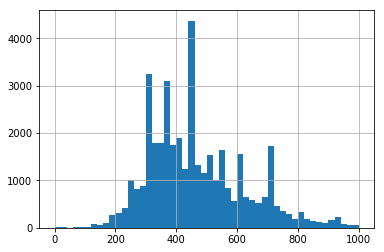

In [197]:
## histogram of suburbs with state-led greenfield residential developments 
land_value_df_2019["AREA"][(land_value_df_2019["SUBURB NAME"].isin(greenfield_development_suburb_list)) & \
                           (land_value_df_2019["AREA TYPE"] == "M")].hist(range=(0, 1000), bins=50)

In [189]:
## search through df
land_value_df_2019[:][(land_value_df_2019["SUBURB NAME"].isin(greenfield_development_suburb_list))].sample(3)

,Unnamed: 0,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,PROPERTY DESCRIPTION,ZONE CODE,AREA,AREA TYPE,BASE DATE 1,LAND VALUE 1,AUTHORITY 1,BASIS 1,BASE DATE 2,LAND VALUE 2,AUTHORITY 2,BASIS 2,BASE DATE 3,LAND VALUE 3,AUTHORITY 3,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34,SOURCE CSV FILENAME,SOURCE ZIP FILENAME
1237744,107668,214,BLACKTOWN,3812027,NORMAL,NaN,NaN,6,SWIFT ST,RIVERSTONE,2765.0,194/1179072,R2,369.0,M,01/07/2018,475000.0,14A(1),6A(1),01/07/2017,470000.0,14A(1),6A(1),01/07/2016,420000.0,14A(1),6A(1),01/07/2015,380000.0,14A(1),6A(1),01/07/2014,290000.0,27B,6A(1),NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1178289,48213,214,BLACKTOWN,2183567,NORMAL,NaN,NaN,53,GLADSTONE PDE,RIVERSTONE,2765.0,2/228834,R2,651.3,M,01/07/2018,493000.0,14A(1),6A(1),01/07/2017,478000.0,14A(1),6A(1),01/07/2016,427000.0,14A(1),6A(1),01/07/2015,386000.0,14A(1),6A(1),01/07/2014,295000.0,14A(1),6A(1),NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1290295,8369,217,CAMDEN,4107878,NORMAL,NaN,NaN,89,LILLYWHITE CCT,ORAN PARK,2570.0,1426/1225553,R2,375.2,M,01/07/2018,389000.0,14A(1),6A(1),01/07/2017,350000.0,27B,6A(1),01/07/2016,350000.0,27B,6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,217_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv





## MARSDEN PARK ANALYSIS 

In [7]:
def get_min_max_of_land_value_df(df):
    min_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].min(), grouping=True)
    max_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].max(), grouping=True)
    return [min_land_value, max_land_value]

#  print([get_min_max_of_land_value_df(land_value_df_2017),
#         get_min_max_of_land_value_df(land_value_df_2018),
#         get_min_max_of_land_value_df(land_value_df_2019)])

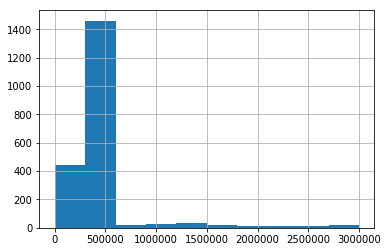

In [8]:
## land value histogram
land_value_df_2017["LAND VALUE 1"][(land_value_df_2017["SUBURB NAME"] == "MARSDEN PARK")].hist(range=(0, 3000000))




## NSW ANALYSIS


In [9]:
suburbs_list_2017 = land_value_df_2017["SUBURB NAME"].unique()
suburbs_list_2018 = land_value_df_2018["SUBURB NAME"].unique()
suburbs_list_2019 = land_value_df_2019["SUBURB NAME"].unique()

## founding of new suburbs

## 2017-2018
print("2017-2018",np.setdiff1d(suburbs_list_2018,suburbs_list_2017))

## 2018-2019
print("2018-2019",np.setdiff1d(suburbs_list_2019,suburbs_list_2018))


2017-2018 ['DIAMOND HEAD' 'FERNANCES CROSSING' 'MOUNT TENANDRA' 'MURRAYS RUN'
 'PERISHER VALLEY']
2018-2019 ['BONDI FOREST' 'MAGOMETON' 'NORTH KELLYVILLE' 'NORWEST']


In [10]:
## create null/not null versions of 2017 and 2019 dataframes
suburbs_list_2017_null = land_value_df_2017[:][land_value_df_2017["PROPERTY NAME"].isnull()]
suburbs_list_2017_not_null = land_value_df_2017[:][~land_value_df_2017["PROPERTY NAME"].isnull()]
suburbs_list_2019_null = land_value_df_2019[:][land_value_df_2019["PROPERTY NAME"].isnull()]
suburbs_list_2019_not_null = land_value_df_2019[:][~land_value_df_2019["PROPERTY NAME"].isnull()]

In [27]:
## land value sum of suburbs
suburb_land_value_sum_2017 = suburbs_list_2017_null.groupby("SUBURB NAME")["LAND VALUE 1"].sum().rename("a")
suburb_land_value_sum_2019 = suburbs_list_2019_null.groupby("SUBURB NAME")["LAND VALUE 1"].sum().rename("b")
suburb_land_value_sum_df = pd.concat([suburb_land_value_sum_2017,
                                      suburb_land_value_sum_2019], axis=1, sort=False).reset_index()

suburb_land_value_sum_df["DIFFERENCE ($)"] = suburb_land_value_sum_df.apply(lambda row: row.b - row.a , axis=1)
suburb_land_value_sum_df.rename(columns={"index": "SUBURB NAME", 
                                         "a": "2017 LAND VALUE ($)", 
                                         "b": "2019 LAND VALUE ($)"}).sort_values(by="DIFFERENCE ($)", ascending=False).head(10)

,SUBURB NAME,2017 LAND VALUE ($),2019 LAND VALUE ($),DIFFERENCE ($)
2666,MOSMAN,1.487654e+10,1.900893e+10,4.132386e+09
3610,SYDNEY,7.745653e+09,1.128333e+10,3.537677e+09
2439,MARSDEN PARK,1.767013e+09,4.188689e+09,2.421676e+09
3573,STRATHFIELD,9.285835e+09,1.166346e+10,2.377624e+09
2438,MARRICKVILLE,8.222658e+09,1.013206e+10,1.909401e+09
823,CASTLE HILL,1.018265e+10,1.199325e+10,1.810595e+09
2246,LEPPINGTON,1.708916e+09,3.407987e+09,1.699072e+09
524,BOX HILL,1.937968e+09,3.564921e+09,1.626954e+09
2452,MASCOT,4.406044e+09,5.977372e+09,1.571328e+09
2408,MANLY,6.413372e+09,7.970970e+09,1.557598e+09


### LAND AREA ANALYSIS

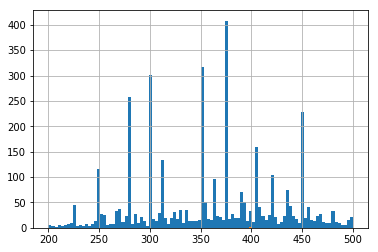

In [131]:
## evidence to support that null property names are 
def create_land_area_hist(df):
    df["AREA"][df["AREA TYPE"] == "M"].hist(range=(200, 500), bins=100)

marsden_park_2019_null_df = suburbs_list_2019_null[:][suburbs_list_2019_null["SUBURB NAME"] == "MARSDEN PARK"]
marsden_park_2019_not_null_df = suburbs_list_2019_not_null[:][suburbs_list_2019_not_null["SUBURB NAME"] == "MARSDEN PARK"]

create_land_area_hist(marsden_park_2019_null_df)
create_land_area_hist(marsden_park_2019_not_null_df)

In [87]:
## check what kind of houses are ~1000 m2
marsden_park_2019_null_df[(marsden_park_2019_null_df["AREA TYPE"] == "M") & \
                          (marsden_park_2019_null_df["AREA"] > 200) & \
                          (marsden_park_2019_null_df["AREA"] < 500)].sort_values(by="LAND VALUE 1", ascending=False)

## marsden park land sizes

,Unnamed: 0,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,PROPERTY DESCRIPTION,ZONE CODE,AREA,AREA TYPE,BASE DATE 1,LAND VALUE 1,AUTHORITY 1,BASIS 1,BASE DATE 2,LAND VALUE 2,AUTHORITY 2,BASIS 2,BASE DATE 3,LAND VALUE 3,AUTHORITY 3,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34,SOURCE CSV FILENAME,SOURCE ZIP FILENAME
1244457,114381,214,BLACKTOWN,3931418,NORMAL,NaN,NaN,3,OLEA ST,MARSDEN PARK,2765.0,1403/1205499,R2,489.600,M,01/07/2018,552000.0,14A(1),6A(1),01/07/2017,527000.0,14A(1),6A(1),01/07/2016,490000.0,14A(1),6A(1),01/07/2015,420000.0,27B,6A(1),01/07/2014,370000.0,27B,6A(1),NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1244464,114388,214,BLACKTOWN,3931425,NORMAL,NaN,NaN,17,OLEA ST,MARSDEN PARK,2765.0,1410/1205499,R2,483.300,M,01/07/2018,545000.0,14A(1),6A(1),01/07/2017,521000.0,14A(1),6A(1),01/07/2016,485000.0,14A(1),6A(1),01/07/2015,420000.0,27B,6A(1),01/07/2014,370000.0,27B,6A(1),NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1244460,114384,214,BLACKTOWN,3931421,NORMAL,NaN,NaN,9,OLEA ST,MARSDEN PARK,2765.0,1406/1205499,R2,480.000,M,01/07/2018,539000.0,14A(1),6A(1),01/07/2017,515000.0,14A(1),6A(1),01/07/2016,485000.0,14A(1),6A(1),01/07/2015,420000.0,27B,6A(1),01/07/2014,370000.0,27B,6A(1),NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1244461,114385,214,BLACKTOWN,3931422,NORMAL,NaN,NaN,11,OLEA ST,MARSDEN PARK,2765.0,1407/1205499,R2,480.000,M,01/07/2018,539000.0,14A(1),6A(1),01/07/2017,515000.0,14A(1),6A(1),01/07/2016,485000.0,14A(1),6A(1),01/07/2015,420000.0,27B,6A(1),01/07/2014,370000.0,27B,6A(1),NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1244462,114386,214,BLACKTOWN,3931423,NORMAL,NaN,NaN,13,OLEA ST,MARSDEN PARK,2765.0,1408/1205499,R2,480.000,M,01/07/2018,539000.0,14A(1),6A(1),01/07/2017,515000.0,14A(1),6A(1),01/07/2016,485000.0,14A(1),6A(1),01/07/2015,420000.0,27B,6A(1),01/07/2014,370000.0,27B,6A(1),NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1138334,8258,214,BLACKTOWN,4209179,NORMAL,NaN,NaN,22,WICKHAM ST,MARSDEN PARK,2765.0,3739/1237910,R2,498.500,M,01/07/2018,528000.0,27B,6A(1),01/07/2017,NaN,NaN,NaN,01/07/2016,470000.0,27B,6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1138333,8257,214,BLACKTOWN,4209178,NORMAL,NaN,NaN,35,MEEHAN TCE,MARSDEN PARK,2765.0,3738/1237910,R2,498.700,M,01/07/2018,528000.0,27B,6A(1),01/07/2017,NaN,NaN,NaN,01/07/2016,470000.0,27B,6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1137655,7579,214,BLACKTOWN,4197403,NORMAL,NaN,NaN,7,BRACKEN ST,MARSDEN PARK,2765.0,5700/1238151,R2,491.800,M,01/07/2018,528000.0,27B,6A(1),01/07/2017,NaN,NaN,NaN,01/07/2016,470000.0,27B,6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1138324,8248,214,BLACKTOWN,4209169,NORMAL,NaN,NaN,17,MEEHAN TCE,MARSDEN PARK,2765.0,3729/1237910,R2,499.000,M,01/07/2018,528000.0,27B,6A(1),01/07/2017,NaN,NaN,NaN,01/07/2016,470000.0,27B,6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1138319,8243,214,BLACKTOWN,4209164,NORMAL,NaN,NaN,15,MEEHAN TCE,MARSDEN PARK,2765.0,3724/1237910,R2,496.300,M,01/07/2018,528000.0,27B,6A(1),01/07/2017,NaN,NaN,NaN,01/07/2016,470000.0,27B,6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv


### NULL/NOT NULL PROPERTY NAME ANALYSIS

In [12]:
## investigating property name column

# sorted(land_value_df_2019["PROPERTY NAME"][~land_value_df_2019["PROPERTY NAME"].isnull()].unique())

# max_null = land_value_df_2019["LAND VALUE 1"][land_value_df_2019["PROPERTY NAME"].isnull()].max()
# land_value_df_2019[:][land_value_df_2019["LAND VALUE 1"] == max_null]

null_land_value_list = sorted(land_value_df_2019["LAND VALUE 1"][land_value_df_2019["PROPERTY NAME"].isnull()])
land_value_df_2019[:][land_value_df_2019["LAND VALUE 1"].isin(null_land_value_list)].sort_values(by=["LAND VALUE 1"], ascending=False)

# land_value_df_2019["LAND VALUE 1"][~land_value_df_2019["PROPERTY NAME"].isnull()].hist()

# land_value_df_2019[:][land_value_df_2019["PROPERTY NAME"].isnull() & (land_value_df_2019["LAND VALUE 1"] < 100)].sort_values(by="LAND VALUE 1", ascending=False)

,Unnamed: 0,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,PROPERTY DESCRIPTION,ZONE CODE,AREA,AREA TYPE,BASE DATE 1,LAND VALUE 1,AUTHORITY 1,BASIS 1,BASE DATE 2,LAND VALUE 2,AUTHORITY 2,BASIS 2,BASE DATE 3,LAND VALUE 3,AUTHORITY 3,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34,SOURCE CSV FILENAME,SOURCE ZIP FILENAME
2599189,27552,708,CITY OF SYDNEY,3819161,NORMAL,NaN,NaN,188,PITT ST,SYDNEY,2000.0,1/1182754,B8,1.186,H,01/07/2018,306000000.0,14A(1),14G,01/07/2017,272000000.0,14A(1),14G,01/07/2016,243000000.0,14A(1),14G,01/07/2015,225000000.0,14A(1),14G,01/07/2014,208000000.0,27,14G,NaN,708_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
346811,5101,81,THE HILLS SHIRE,4201444,NORMAL,NaN,NaN,4-10,CELEBRATION DR,BELLA VISTA,2153.0,"101/1084481 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",B7,21.946,H,01/07/2018,250000000.0,14A(2),6A(1),01/07/2017,NaN,NaN,NaN,01/07/2016,200000000.0,14A(2),6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,081_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
2594104,22467,708,CITY OF SYDNEY,3169836,NORMAL,NaN,NaN,50,BRIDGE ST,SYDNEY,2000.0,2/1073376,B8,5838.000,M,01/07/2018,246000000.0,14A(1),6A(2),01/07/2017,196875000.0,14A(1),6A(2),01/07/2016,165000000.0,14A(1),6A(2),01/07/2015,151000000.0,14A(1),6A(2),01/07/2014,137000000.0,14A(1),6A(2),NaN,708_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
2593732,22095,708,CITY OF SYDNEY,4040113,NORMAL,NaN,NaN,1,ALFRED ST,SYDNEY,2000.0,8/1224258,B8,4041.000,M,01/07/2018,245000000.0,14A(1),6A(1),01/07/2017,195000000.0,14A(1),6A(1),01/07/2016,178000000.0,14A(2),6A(1),01/07/2015,135000000.0,14A(2),6A(1),01/07/2014,NaN,NaN,NaN,NaN,708_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
526875,25985,90,RYDE,3989413,NORMAL,NaN,NaN,112,TALAVERA RD,MACQUARIE PARK,2113.0,422/1221081,B4,1.953,H,01/07/2018,230000000.0,14A(1),6A(1),01/07/2017,222700000.0,14A(1),6A(1),01/07/2016,70000000.0,27B,6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,090_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
2594707,23070,708,CITY OF SYDNEY,3716196,NORMAL,NaN,NaN,1,FARRER PL,SYDNEY,2000.0,104/836610,B8,3.067,H,01/07/2018,225319854.0,14A(1),6A(2)/26A,01/07/2017,182401811.0,14A(1),6A(2)/26A,01/07/2016,165505228.0,14A(1),6A(2)/26A,01/07/2015,150786851.0,14A(1),6A(2)/26A,01/07/2014,131350892.0,14A(1),6A(2)/26A,NaN,708_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1186170,56094,214,BLACKTOWN,4106580,NORMAL,NaN,NaN,NaN,RICHMOND RD,MARSDEN PARK,2765.0,3/1230408,R2,93.280,H,01/07/2018,224000000.0,14A(1),6A(1),01/07/2017,185000000.0,27B,6A(1),01/07/2016,160000000.0,27B,6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
2002562,48160,261,CUMBERLAND,3623946,NORMAL,NaN,NaN,14-54,DENNISTOUN AVE,YENNORA,2161.0,21/1171076,IN1,70.033,H,01/07/2018,186000000.0,14A(1),6A(1),01/07/2017,95300000.0,14A(1),6A(1),01/07/2016,86100000.0,14A(1),6A(1),01/07/2015,83800000.0,14A(1),6A(1),01/07/2014,79500000.0,14A(1),6A(1),NaN,261_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1954225,48212,260,CITY OF PARRAMATTA,3956735,NORMAL,NaN,NaN,15,CARTER ST,LIDCOMBE,2141.0,12/1217641,R4,4.569,H,01/07/2018,173000000.0,14A(1),6A(1),01/07/2017,175000000.0,14A(1),6A(1),01/07/2016,17200000.0,14A(1),6A(1),01/07/2015,14000000.0,27B,6A(1),01/07/2014,NaN,NaN,NaN,NaN,260_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
393882,52172,81,THE HILLS SHIRE,3845503,NORMAL,NaN,NaN,NaN,OLD WINDSOR RD,KELLYVILLE,2155.0,"11/1063682 1/1066762 102, 104/1122070 1, 2, 3,...",B2,17.530,H,01/07/2018,166000000.0,14A(1),6A(1),01/07/2017,150000000.0,14A(2),6A(1),01/07/2016,142000000.0,14A(2),6A(1),01/07/2015,21800000.0,14A(1),6A(1),01/07/2014,21760000.0,14A(2),6A(1),NaN,081_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv


In [13]:
## quantile range
null_property_name_series = land_value_df_2019["LAND VALUE 1"][land_value_df_2019["PROPERTY NAME"].isnull()]
not_null_property_name_series = land_value_df_2019["LAND VALUE 1"][~land_value_df_2019["PROPERTY NAME"].isnull()]

print(null_property_name_series.quantile([0, 0.25, 0.5, 0.75, 1]))
print(not_null_property_name_series.quantile([0, 0.25, 0.5, 0.75, 1]))

0.00            1.0
0.25       224000.0
0.50       418000.0
0.75       787000.0
1.00    306000000.0
Name: LAND VALUE 1, dtype: float64
0.00            1.0
0.25       131000.0
0.50       382000.0
0.75      1070000.0
1.00    608000000.0
Name: LAND VALUE 1, dtype: float64


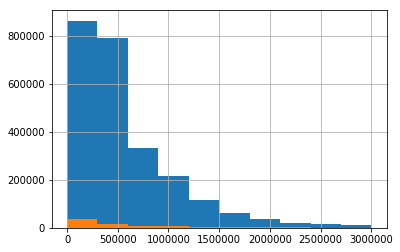

In [28]:
## histograms
null_property_name_series.hist(range=(0, 3000000))
not_null_property_name_series.hist(range=(0, 3000000))






# CRIME DATA

In [232]:
## getting crime data
NSW_crime_data_filepath = Path("data/SuburbData2018.csv")
NSW_crime_df = pd.read_csv(NSW_crime_data_filepath)

In [153]:
# checking structure of crima data
NSW_crime_df.sample(3)

,Suburb,Offence category,Subcategory,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,Aug 1995,Sep 1995,Oct 1995,Nov 1995,Dec 1995,Jan 1996,Feb 1996,Mar 1996,Apr 1996,May 1996,Jun 1996,Jul 1996,Aug 1996,Sep 1996,Oct 1996,...,Dec 2016,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018
234606,The Risk,Transport regulatory offences,Transport regulatory offences,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90577,Fairfield East,Against justice procedures,Fail to appear,0,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199781,Pucawan,Theft,Break and enter non-dwelling,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
## search df for string
NSW_crime_df["Suburb"][NSW_crime_df["Suburb"].str.contains("Maryland") == True].unique()

array(['Maryland (Newcastle)', 'Maryland (Tenterfield)'], dtype=object)

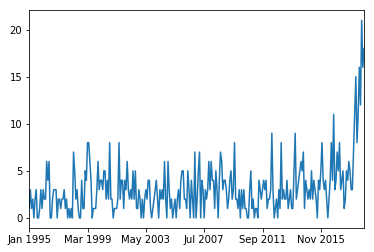

In [205]:
## suburb crime histogram
suburb_crime_df = NSW_crime_df[:][NSW_crime_df["Suburb"] == "Box Hill"]
suburb_crime_timeseries = suburb_crime_df.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).sum()
suburb_crime_timeseries.plot()

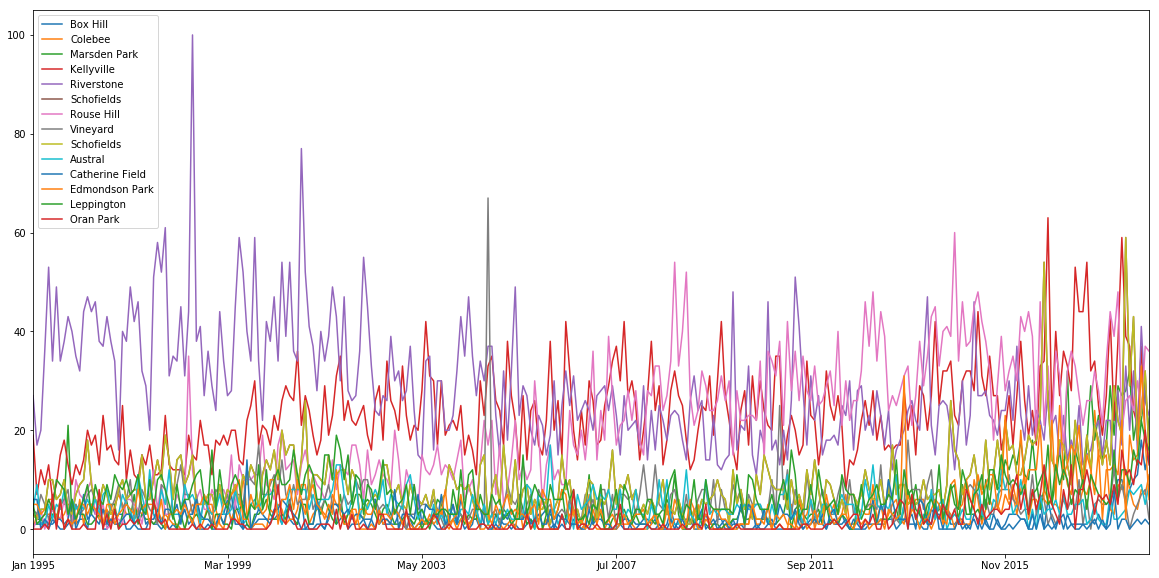

In [325]:
## loop through suburbs with state-led greenfield residential developments and create timeseries graph
propercase_greenfield_development_suburb_list = [k.title() for k in greenfield_development_suburb_list]

def create_crime_sum_pd_time_series(suburb):
    current_suburb_df = NSW_crime_df[:][(NSW_crime_df["Suburb"] == suburb) & (NSW_crime_df["Offence category"] == "Theft")]
    current_suburb_timeseries = current_suburb_df.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).reset_index()
    current_suburb_timeseries_sum = current_suburb_timeseries.sum(axis = 0)
    current_suburb_sum_series = pd.Series(current_suburb_timeseries_sum,
                                          index=current_suburb_timeseries.columns.values,
                                          name=suburb).drop(["index"])
    return current_suburb_sum_series

create_crime_sum_pd_time_series(propercase_greenfield_development_suburb_list[0])

greenfield_development_suburb_crime_df = pd.concat([create_crime_sum_pd_time_series(suburb) for suburb in propercase_greenfield_development_suburb_list], axis=1)
greenfield_development_suburb_crime_df.plot(figsize=(20,10))

In [324]:
## types of offences
unique_offence_categories = NSW_crime_df["Offence category"].unique()
sorted(unique_offence_categories)

['Abduction and kidnapping',
 'Against justice procedures',
 'Arson',
 'Assault',
 'Betting and gaming offences',
 'Blackmail and extortion',
 'Disorderly conduct',
 'Drug offences',
 'Homicide',
 'Intimidation, stalking and harassment',
 'Liquor offences',
 'Malicious damage to property',
 'Other offences',
 'Other offences against the person',
 'Pornography offences',
 'Prohibited and regulated weapons offences',
 'Prostitution offences',
 'Robbery',
 'Sexual offences',
 'Theft',
 'Transport regulatory offences']

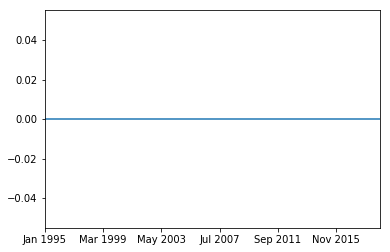

In [150]:
## filter suburb and offence category then plot
marsdenpark_data = NSW_crime_df[:][(NSW_crime_df["Suburb"] == "Leppington") &
                                   (NSW_crime_df["Offence category"] == "Theft")]
total_crime_timeseries = marsdenpark_data.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).sum()
total_crime_timeseries.plot()